In [3]:
import os
import shutil
import pdb
fname="/home/kallanved/Downloads/C1/C1/debayered/"
new_path1="/home/kallanved/CAM0_2-Brett-2019-07-08-3d/cal_images0/"
new_path2="/home/kallanved/CAM0_2-Brett-2019-07-08-3d/cal_images1/"
new_path3="/home/kallanved/CAM0_2-Brett-2019-07-08-3d/cal_images2/"
os.chdir(path=fname)
key0='camera: 0'
key1='camera: 1'
key2="camera: 2"
newkey0="camera-0"
newkey1="camera-1"
newkey2="camera-2"
for dir, subdirs, files in os.walk("."):
    #pdb.set_trace()
    for g in range(0,len(subdirs)):
        a=str(subdirs[g])
        #pdb.set_trace()
        for dirs, subdirs1, f in os.walk(os.path.join(fname,a)):
            #pdb.set_trace()
            #dirs=str(dirs)
            pdb.set_trace()
            for i in range(0,3):
                if key1 in f[i]:
                    os.rename(os.path.join(str(dirs),str(f[i])), os.path.join(dirs,newkey1+str(f[i])))
                    shutil.move(os.path.join(dirs,newkey1+str(f[i])), new_path2)
                if key0 in f[i]:
                    os.rename(os.path.join(dirs,str(f[i])), os.path.join(dirs,newkey0+str(f[i])))
                    shutil.move(os.path.join(dirs,newkey0+str(f[i])), new_path1)
                if key2 in f[i]:
                    os.rename(os.path.join(dirs,str(f[i])), os.path.join(dirs,newkey2+str(f[i])))
                    shutil.move(os.path.join(dirs,newkey2+str(f[i])), new_path3)
                else:
                    continue

> <ipython-input-3-680302840ed1>(24)<module>()
-> for i in range(0,3):
(Pdb) exi
*** NameError: name 'exi' is not defined
(Pdb) exit


BdbQuit: 

In [1]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    # SUB PIXEL CORNER DETECTION CRITERION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(corners)>0:
            # SUB PIXEL DETECTION
            for corner in corners:
                cv2.cornerSubPix(gray, corner,
                                 winSize = (3,3),
                                 zeroZone = (-1,-1),
                                 criteria = criteria)
            res2 = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize

In [2]:
def calibrate_camera(allCorners,allIds,imsize):
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")

    cameraMatrixInit = np.array([[ 1000.,    0., imsize[0]/2.],
                                 [    0., 1000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
    #flags = (cv2.CALIB_RATIONAL_MODEL)
    (ret, camera_matrix, distortion_coefficients0,
     rotation_vectors, translation_vectors,
     stdDeviationsIntrinsics, stdDeviationsExtrinsics,
     perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return ret, camera_matrix, distortion_coefficients0, rotation_vectors, translation_vectors

In [1]:
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_250)
board = aruco.CharucoBoard_create(12, 12, 7, .8, aruco_dict)
imboard = board.draw((2000, 2000))
cv2.imwrite("chessboard.png", imboard)

datadir = "/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/"
images = np.array([datadir + f for f in os.listdir(datadir) if f.endswith(".png") ])
#order = np.argsort([int(p.split(".")[-2].split("_")[-1]) for p in images])
#images = images[order]
# images of aruco are loaded
images



array(['/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950832167.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559951037802.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950665914.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559951003339.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775552156.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950937170.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950723894.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950761464.png',
       '/home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559775544359.png',
 

In [6]:
allCorners,allIds,imsize=read_chessboards(images)
# this will run checkerboard corner finding

POSE ESTIMATION STARTS:
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950832167.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559951037802.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950665914.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559951003339.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775552156.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950937170.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950723894.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950761464.png
=> Proce

=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950850892.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951030969.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951003339.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775429483.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559951027888.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775633219.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775763952.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951002790.png
=> Processing image /home/kallan

=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775537760.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950996703.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950684291.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559775555174.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951034036.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950670233.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775447980.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950996703.png
=> Processing image /home/kallan

=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951010037.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775772176.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775467838.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559775697537.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950988930.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775503669.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950758962.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950655210.png
=> Processing image /home/kallan

=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950853464.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559950912954.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951025945.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559951002022.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950874901.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559950706866.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-1camera: 1, t: 1559775549963.png
=> Processing image /home/kallanved/CAM02-Brett-2019-07-08-3d/calibration_images/camera-2camera: 2, t: 1559775436726.png
=> Processing image /home/kallan

In [17]:
ret, mtx, dist, rvecs, tvecs = calibrate_camera(allCorners,allIds,imsize)
 ## I can find corners along most of my images
    # This means that if I implement this correctly into DLC I can actually do stuff

    
len(images)

CAMERA CALIBRATION


311

In [87]:


""" Calibration code sourced and modified from https://walchko.github.io/blog/Vision/aruco/marker-calibration.html by Brett Nelson 2019"""

def get_images(path, gray=False):
    """
    Given a path, it reads all images. This uses glob to
    grab file names and excepts wild cards *
    Ex. getImages('./images/*.jpg')
    """
    imgT=[]
    files = glob(path)
    files.sort()  # put in order

    print("Found {} images at {}".format(len(tuple(files)), path))
    # print('-'*40)

    for i, f in enumerate(files):
        img = cv2.imread(f)
        if img is None:
            print('>> Could not read: {}'.format(f))
        else:
            h, w = img.shape[:2]

            if gray:
                if len(img.shape) > 2:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            imgT.append(img)
    # print('-'*40)
    return imgT


class Calibrate(object):
    """Calibrate an individual camera"""

    def __init__(self):
        self.dictionary = aruco.Dictionary_get(aruco.DICT_4X4_50)
        parameters = aruco.DetectorParameters_create()
        x = 5  # horizontal
        y = 7  # vertical
        sqr = 0.254  # solid black squares
        mrk = 0.23  # markers, must be smaller than squares
        self.board = aruco.CharucoBoard_create(
            x, y,
            sqr,
            mrk,
            self.dictionary)

    def calculateReprojectionError(self, imgpoints, objpoints, rvecs, tvecs, mtx, dist):
        """
        imgpts: features found in image, (num_imgs, 2)
        objpts: calibration known features in 3d, (num_imgs, 3)
        """
        imgpoints = [c.reshape(-1, 2) for c in imgpoints]
        mean_error = 0
        for i in range(len(objpoints)):
            #             print('img',imgpoints[i].shape)
            #             print('obj', objpoints[i].shape)
            imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
            imgpoints2 = cv2.UMat.get(imgpoints2)
            imgpoints2 = imgpoints2.reshape(-1, 2)
            #             print('img2', imgpoints2.shape)

            # if not all markers were found, then the norm below will fail
            if len(imgpoints[i]) != len(imgpoints2):
                continue

            error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
            mean_error += error
        print("total error: {}".format(mean_error / len(objpoints)))

    def calibrate(self, imgs,undistort=False,D=None, K=None):
        
        ### Code here to change array stylizing
        calcorners=[]
        calids=[]
        h, w = imgs[0].shape[:2]
        #c_array=np.full([len(imgs),11*11,2],0)# stack of points initialized
        #calids=np.full([len(imgs),11*11],0)
        # so we know a little bit about the camera, so
        # start off the algorithm with a simple guess
        f = max(h, w)  # focal length is a function of image size in pixels
        if K is None:
            K = np.array([
                [f, 0, w // 2],
                [0, f, h // 2],
                [0, 0, 1]
            ])
        counter = 0
        for im in imgs:
            # make grayscale if it is not already
            if len(im.shape) > 2:
                gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            else:
                gray = im.copy()
            if undistort:
                im=self.undistort_image(im,K,D)

            corners, ids, rejectedImgPts = aruco.detectMarkers(gray, self.dictionary)
            #             print("detectMarkers found {} corners {} ids".format(
            #                 len(corners), len(ids)))

            # if ids were found, then
            if ids is not None and len(ids) > 4:
                ret, chcorners, chids = aruco.interpolateCornersCharuco(
                    corners, ids, gray, self.board)
                #                 print("interpolateCornersCharuco[{}] found {} corners {} ids".format(
                #                     ret, len(chcorners), len(chids)))
                
                #chcorners=np.squeeze(chcorners)
                #calids=np.squeeze(calids)
                calcorners.append(chcorners)
                calids.append(chids)

#                 ix= np.swapaxes(chcorners,0,1)
#                 iy=np.swapaxes(chids,0,1)
#                 #pdb.set_trace()
#                 c_list.append(ix)
#                 chids_list.append(iy)
#                 c_array[counter,0:len(chcorners),:]=ix
#                 calids[counter,0:len(chids)]=iy
#                 counter +=1
        # code here to clean nan's
        
        #pdb.set_trace()
        flags = 0
        flags |= cv2.CALIB_USE_INTRINSIC_GUESS  # make an inital guess at cameraMatrix (K)
        #         flags |= cv2.CALIB_FIX_PRINCIPAL_POINT  # value? makes it worse
        #pdb.set_trace()
        #lenval=len(calcorners)
#         dump_key = []
#         for i in range(0,8):
#             cc=np.array(calcorners[i])
#             length_val=np.ma.size(cc,axis=0)
#             if length_val < 4:
#                 del calcorners[i], calids[i]
#                 dump_key.append(i)
        #pdb.set_trace()
        rms, cameraMatrix, distCoeffs, rvecs, tvecs = aruco.calibrateCameraCharuco(
            calcorners,calids, self.board, (w, h), K, None, flags=flags)

        cam_params = {
            'marker_type': 'aruco',
            'cameraMatrix': cameraMatrix,
            'distCoeffs': distCoeffs,
            'image_size': imgs[0].shape[:2],
            #             'marker_size': (x,y),
            #             'marker_scale:': sqr
            'rms': rms
        }
        #         objpts = [self.board.chessboardCorners.copy() for c in calcorners]
        h, w = self.board.chessboardCorners.shape
        objpts = [self.board.chessboardCorners.reshape((h, 1, 3)) for i in range(0,len(imgs))]
        
        #imgpts = c_array

        print('obj', len(objpts))
        #print('imgpts', len(imgpts))

        #self.calculateReprojectionError(imgpts, objpts, rvecs, tvecs, cameraMatrix, distCoeffs)

        return rms, cameraMatrix, distCoeffs, rvecs, tvecs, objpts,calcorners,calids


    def extrinsics_calibration(self,objpoints,imgpoints_l,imgpoints_r,M1,d1,M2,d2,imsize):
        flags = 0
        # flags |= cv2.CALIB_FIX_INTRINSIC
        # flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
        flags |= cv2.CALIB_USE_INTRINSIC_GUESS
        flags |= cv2.CALIB_FIX_FOCAL_LENGTH
        # flags |= cv2.CALIB_FIX_ASPECT_RATIO
        # flags |= cv2.CALIB_ZERO_TANGENT_DIST
        # flags |= cv2.CALIB_RATIONAL_MODEL
        # flags |= cv2.CALIB_SAME_FOCAL_LENGTH
        # flags |= cv2.CALIB_FIX_K3
        # flags |= cv2.CALIB_FIX_K4
        # flags |= cv2.CALIB_FIX_K5

        stereocalib_criteria = (cv2.TERM_CRITERIA_MAX_ITER +
                                cv2.TERM_CRITERIA_EPS, 100, 1e-5)

        h, w = imsize[0].shape[:2]

        ret, M1, d1, M2, d2, R, T, E, F = cv2.stereoCalibrate(
            objpoints,
            imgpoints_l,
            imgpoints_r,
            M1, d1,
            M2, d2,
            (w, h),
            criteria=stereocalib_criteria,
            flags=flags)
        return ret, M1, d1, M2, d2, R, T, E, F
    
    def undistort_image(self,im, K, D):
        """
        Optionally: 
            newcamera, roi = cv2.getOptimalNewCameraMatrix(self.K, self.D, (W,H), 0) 
        """
        H, W = im.shape[:2]
        Kprime, roi = cv2.getOptimalNewCameraMatrix(K, D, (W, H), 1, (W, H))
        return cv2.undistort(im, K, D, None, K)



In [5]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt
# import cv2.aruco as aruco
# from glob import glob
# import pickle
# from array import array
# import pdb


# class Calibrate(object):
#     """Calibrate an individual camera"""
#     def __init__(self):
#         self.dictionary = aruco.Dictionary_get(aruco.DICT_4X4_50)
#         parameters = aruco.DetectorParameters_create()
#         x = 5  # horizontal
#         y = 7  # vertical
#         sqr = 0.254  # solid black squares
#         mrk = 0.23 # markers, must be smaller than squares
#         self.board = aruco.CharucoBoard_create(
#             x,y,
#             sqr,
#             mrk,
#             self.dictionary)
        
#     def calculateReprojectionError(self, imgpoints, objpoints, rvecs, tvecs, mtx, dist):
#         """
#         imgpts: features found in image, (num_imgs, 2)
#         objpts: calibration known features in 3d, (num_imgs, 3)
#         """
#         imgpoints = [c.reshape(-1,2) for c in imgpoints]
#         mean_error = 0
#         error_=[]
#         for i in range(len(objpoints)):
# #             print('img',imgpoints[i].shape)
# #             print('obj', objpoints[i].shape)
#             imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
#             imgpoints2=imgpoints2.get()
#             #pdb.set_trace()
#             imgpoints2 = imgpoints2.reshape(-1,2)
# #             print('img2', imgpoints2.shape)
            
#             # if not all markers were found, then the norm below will fail
#             if len(imgpoints[i]) != len(imgpoints2):
#                 continue
                
#             error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
#             #print(error)
#             mean_error += error
#             error_.append(error)
#         print( "total error: {}".format(mean_error/len(objpoints)) )
#         return mean_error/len(objpoints),error_
        
#     def calibrate(self, imgs,undistort=False,K=None,D=None):
#         calcorners = []  # 2d points in image
#         calids = []  # ids found in image
#         h,w = imgs[0].shape[:2]
        
#         # so we know a little bit about the camera, so
#         # start off the algorithm with a simple guess
#         f = max(h,w)  # focal length is a function of image size in pixels
#         if K is None:
            
#             K = np.array([
#                 [f,0,w//2],
#                 [0,f,h//2],
#                 [0,0,1]
#             ])
        
#         dump_key = []
#         counter=0
#         for im in imgs:
#             # make grayscale if it is not already
#             if len(im.shape) > 2:
#                 gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#             else:
#                 gray = im.copy()
#             if undistort:
#                 im=undistort_image(im,K,D)
            
#             corners, ids, rejectedImgPts = aruco.detectMarkers(gray, self.dictionary)
#             if ids is not None and len(corners) > 0:
#                 ret, chcorners, chids = aruco.interpolateCornersCharuco(
#                     corners, ids, gray, self.board)
                
#                 if chcorners is not None and len(np.squeeze(chcorners)) > 2:
#                     chcorners=np.squeeze(chcorners)
#                     chids=np.squeeze(chids)
#                    # pdb.set_trace()
#                     try:
#                         (x,y) = chcorners.shape
#                     except:
#                         continue
#                     if x > 5:
#                         calcorners.append(chcorners)
#                         calids.append(chids)
#                     else:
#                         continue
                
#                 else:
#                     print('Image not found.')
#                     continue
#         xi=len(calcorners)
#         for ix in range(0,xi):
#             (ax,bx)=calcorners[ix].shape
#             (cx,)=calids[ix].shape
            
#             if ax == cx:
#                 continue
#             else:
#                 dump_key.append(ix)
        
#         for i in dump_key:
#             del calcorners[i]
#             del calids[i]
#         pdb.set_trace()
#         chids=np.array([chids])
#         #chids=np.swapaxes(chids,0,1)
#         counter=0
#         flags = 0
#         flags |= cv2.CALIB_USE_INTRINSIC_GUESS  # make an inital guess at cameraMatrix (K)
# #         flags |= cv2.CALIB_FIX_PRINCIPAL_POINT  # value? makes it worse
#         rms, cameraMatrix, distCoeffs, rvecs, tvecs = aruco.calibrateCameraCharuco(
#             chcorners, chids, self.board, (w,h), K, None, flags=flags)
        
#         cam_params = {
#             'marker_type': 'aruco',
#             'cameraMatrix': cameraMatrix,
#             'distCoeffs': distCoeffs,
#             'image_size': imgs[0].shape[:2],
# #             'marker_size': (x,y),
# #             'marker_scale:': sqr
#             'rms': rms
#         }
#         h, w = self.board.chessboardCorners.shape
#         objpts = [self.board.chessboardCorners.reshape((1,h,3)) for c in calcorners]
#         imgpts = calcorners
#         meanerror,errors=self.calculateReprojectionError(imgpts, objpts, rvecs, tvecs, cameraMatrix, distCoeffs)
        
#         return (rms, cameraMatrix, distCoeffs, rvecs, tvecs, objpts, imgpts,meanerror,errors)
    
    

In [90]:

cal=Calibrate()
fname1='/home/kallanved/tracking/C/C0/*.png'
fname2='/home/kallanved/tracking/C/C1/*.png'
fname3='/home/kallanved/tracking/C/C2/*.png'
img1=get_images(fname1, gray=True)
img2=get_images(fname2,gray=True)
img3=get_images(fname3,gray=True)
i3=np.asarray(img3)
i1=np.asarray(img1)
i2=np.asarray(img2)
rms1_1, M1, d1, r1, t1, objpoints1, corners1,ids1 = cal.calibrate(i1)
rms2_1, M2, d2, r2, t2, objpoints2,corners2,ids2 = cal.calibrate(i2)
rms3_1, M3, d3, r3, t3, objpoints3,corners3,ids3 = cal.calibrate(i3)

# now I need to reproject the points and then perform calibration on undistorted images.
rms1, M1, d1, r1, t1, objpoints1, corners1,ids1 = cal.calibrate(i1,undistort=True,D=d1,K=M1)
rms2, M2, d2, r2, t2, objpoints2,corners2,ids2 = cal.calibrate(i2,undistort=True,D=d2,K=M2)
rms3, M3, d3, r3, t3, objpoints3,corners3,ids3 = cal.calibrate(i3,undistort=True,D=d2,K=M3)


Found 13 images at /home/kallanved/tracking/C/C0/*.png
Found 15 images at /home/kallanved/tracking/C/C1/*.png
Found 22 images at /home/kallanved/tracking/C/C2/*.png
obj 13
obj 15
obj 22
obj 13
obj 15
obj 22


In [127]:
## import pandas as pd
import csv

## Run this to get arrays after calibration
# M1=M1.get()
# M2=M2.get()
# M3=M3.get()
# d1=d1.get()
# d2=d2.get()
# d3=d3.get()
## Now dump into a csv for post-processing in Matlab
# M=np.vstack((M1,M2))
# M=np.vstack((M,M3))
# np.savetxt("Matrix.csv",M,delimiter=",")
# D=np.vstack((d1,d2))
# D=np.vstack((D,d3))
# np.savetxt("Dist.csv",D,delimiter=",")
with open('objs.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(objpoints1)

   

In [94]:
hold1=np.zeros((1,24,2))
hold2=np.zeros((1,24,2))
holdobj=np.zeros((1,24,3))
for i in range(0,6):
    oo=np.array(corners1[i])
    gg=np.array(corners2[i])
    ff=np.array(objpoints1[i])
    (ee,ix,z)=oo.shape
    (eee,iy,zz)=gg.shape
    #pdb.set_trace()
    if ix >= iy:
        # cut by iy into 1
        hold1.append(oo[:,0:iy,:])
        hold2.append(gg)
        holdobj.append(ff[:,0:iy,:])
    if iy > ix:
        hold1.append(oo)
        hold2.append(gg[:,0:ix,:])
        holdobj.append(ff[:,0:iy,:])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

NameError: name 'imgpoints_1' is not defined

In [96]:
imgpoints_1 = np.array([corners1])
imgpoints_2 = np.array([corners2])
objpoints1=np.array([objpoints1])

In [100]:
flags = 0
# flags |= cv2.CALIB_FIX_INTRINSIC
# flags |= cv2.CALIB_FIX_PRINCIPAL_POINT
flags |= cv2.CALIB_USE_INTRINSIC_GUESS
flags |= cv2.CALIB_FIX_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_ASPECT_RATIO
# flags |= cv2.CALIB_ZERO_TANGENT_DIST
# flags |= cv2.CALIB_RATIONAL_MODEL
# flags |= cv2.CALIB_SAME_FOCAL_LENGTH
# flags |= cv2.CALIB_FIX_K3
# flags |= cv2.CALIB_FIX_K4
# flags |= cv2.CALIB_FIX_K5
pdb.set_trace()
stereocalib_criteria = (cv2.TERM_CRITERIA_MAX_ITER +
                        cv2.TERM_CRITERIA_EPS, 100, 1e-5)

h, w = i1[0].shape[:2]
# note I added function above peicewise

ret, M1, d1, M2, d2, R, T, E, F = cv2.stereoCalibrate(
    objpoints1[0],imgpoints_1[0],imgpoints_2[0],
    M1, d1,
    M2, d2,
    (w,h),
    criteria=stereocalib_criteria,
    flags=flags
    )

--Return--
> <ipython-input-100-e217d00b6e69>(13)<module>()->None
-> pdb.set_trace()
(Pdb) c


error: OpenCV(4.1.0) /io/opencv/modules/calib3d/src/calibration.cpp:3352: error: (-215:Assertion failed) nimages > 0 && nimages == (int)imagePoints1.total() && (!imgPtMat2 || nimages == (int)imagePoints2.total()) in function 'collectCalibrationData'


In [16]:
# this works for complete images.
R1, R2, P1, P2, Q, roi1, roi2 = cv2.stereoRectify(M1, d1, M2,d2,
                                                              (w,h), R, T, alpha=0.9)

In [21]:
# raw code to project points into 3-D
# need 2-vector of points from inside frame 
#x1=np.array()
X = cv2.triangulatePoints( P1, P2, imgpoints_1, imgpoints_2 )

X=X.get()
X=X/X[3]
X
### can use these coords to plot pointcloud and project back


array([[ -30.380991 , -366.34436  ,   40.18568  ,   41.247185 ,
         -29.926567 , -361.54944  , -373.87982  , -375.26202  ,
        -350.3752   , -361.22366  , -370.18454  , -382.79596  ,
        -347.69873  , -358.00247  , -359.433    , -377.7074   ,
        -344.1647   , -356.36063  , -356.0879   , -379.57297  ,
        -344.8333   , -347.98752  , -363.194    , -373.56677  ],
       [   1.8134496,   22.792913 ,   -2.7970917,   -3.1622303,
           1.8048353,   22.795422 ,   26.308334 ,   29.051584 ,
          19.655775 ,   23.076742 ,   26.372353 ,   29.96391  ,
          19.79057  ,   23.083149 ,   25.863985 ,   29.898563 ,
          19.77405  ,   23.249231 ,   25.890451 ,   30.364988 ,
          20.082748 ,   22.995287 ,   26.743315 ,   30.140114 ],
       [   8.564297 ,   94.76881  ,  -10.395202 ,  -10.669565 ,
           8.514697 ,   94.25962  ,   97.449905 ,   97.80828  ,
          92.10586  ,   94.932304 ,   97.245766 ,  100.51746  ,
          92.14701  ,   94.82008  ,   

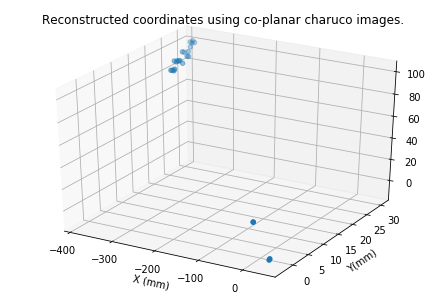

In [30]:

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X[0,:], X[1,:], X[2,:])
plt.title('Reconstructed coordinates using co-planar charuco images.')
plt.xlabel('X (mm)')
plt.ylabel('Y(mm)')
#plt.zlabel('Z (mm)')
plt.savefig('Reconstructed_charuco.png')
pyplot.show()

In [25]:
newpts1=cv2.projectPoints(X[0:3,:], R, T, M1, d1)

error: OpenCV(4.1.0) /io/opencv/modules/calib3d/src/calibration.cpp:3563: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_64F) in function 'projectPoints'


## I ran through the entire example found at https://walchko.github.io/blog/Vision/aruco/marker-calibration.html and added plots etc 
## Thoughts: 
### First, we need more images and we need them to be in multiple fields of view. This is very difficult for our camera setup.
### Second, triangulation requires a very robust estimation of extrinsics as well as undistorted points in order to collect data. There are two outliers present there that could most likely be ignored. 
### Third, there is a large amount of information lost in this process..Between each step inside of calibration we lose information due to error etc that can only be toned down so much, especially for our camera setup. 

